In [1]:
import numpy as np 
import pandas as pd 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
import pandas as pd 
import numpy as np
train = pd.read_csv('news_train.csv') 
test = pd.read_csv('news_test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
import glob
import pandas as pd
from tensorflow import keras
import numpy as np
import os 
from sklearn.model_selection import StratifiedKFold
import matplotlib.pylab as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import TimeDistributed, Conv2D, Conv2DTranspose, MaxPooling2D, AveragePooling2D, BatchNormalization, concatenate, Input, ConvLSTM2D, Reshape, Conv3D, Flatten, LSTM, GRU, Dense,Dropout, Add
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalMaxPool1D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import Sequential, load_model
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import re 

import nltk # for stopwords 
from nltk.corpus import stopwords
import gensim # for Word2Vec embeddings 
from sentencepiece import SentencePieceTrainer,SentencePieceProcessor
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
train.head(20)

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0
5,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",[이데일리 권오석 기자] 중소벤처기업부(이하 중기부)는 대한민국 동행세일에 7개 T...,2,0
6,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","대한민국 동행세일은 라이브 커머스, 언택트 콘서트, O2O 행사 연계 등 비대면이라...",3,0
7,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","6개 권역에서의 현장행사와 온·오프라인 판촉, TV홈쇼핑 등 연계행사를 통해 소비심...",4,0
8,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",이번 동행세일에서는 롯데·공영·CJ·현대·GS·NS·홈앤쇼핑 등 7개 TV 홈쇼핑사...,5,0
9,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","동행세일 기간 중 홈쇼핑사에서는 판매방송 사이에 영상을 노출하는 방식(SB, sta...",6,0


In [5]:
from konlpy.tag import Mecab 
mecab_tokenizer = Mecab() 
sample_content = train['content'][0]  
sample_title = train['title'][0]

In [6]:
x = mecab_tokenizer.morphs(sample_title)

In [7]:
x

['[', '마감', ']', '코스닥', '기관', '678', '억', '순매도']

In [8]:
mecab_tokenizer.morphs(sample_content)

['[',
 '이',
 '데일리',
 'MARKETPOINT',
 ']',
 '15',
 ':',
 '32',
 '현재',
 '코스닥',
 '기관',
 '678',
 '억',
 '순매도']

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.preprocessing.text import Tokenizer 


In [10]:
x_train = train['title']

In [11]:
arr = [] 
for i in range(x_train.shape[0]):  
    arr.append(len(x_train[i]))

In [12]:
np.max(arr)

93

In [13]:
x_mecab = [] 
for i in range(500):  
    x_mecab.append(mecab_tokenizer.morphs(x_train[i])) 

In [14]:
x_mecab = np.asarray(x_mecab)
x_mecab.shape

(500,)

In [15]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(x_mecab)

In [16]:
word_idx = tokenizer.word_index

In [17]:
word_idx

{',': 1,
 '에': 2,
 '…': 3,
 '"': 4,
 '만': 5,
 "'": 6,
 '[': 7,
 ']': 8,
 '도': 9,
 '!': 10,
 '한': 11,
 '.': 12,
 '코로나': 13,
 '`': 14,
 '%': 15,
 '년': 16,
 '‘': 17,
 '7': 18,
 '중': 19,
 '대': 20,
 '개발': 21,
 '다': 22,
 '자': 23,
 '2': 24,
 '고': 25,
 '3': 26,
 '반도체': 27,
 '·': 28,
 '’': 29,
 '세요': 30,
 '가': 31,
 '마법': 32,
 '공식': 33,
 '월': 34,
 '덱스': 35,
 '1': 36,
 'q': 37,
 '산뜻': 38,
 '출발': 39,
 '생산': 40,
 '능력': 41,
 '확대': 42,
 '마감': 43,
 '12': 44,
 '상승': 45,
 '소비': 46,
 '들': 47,
 '上': 48,
 '롯데': 49,
 '하': 50,
 '규제': 51,
 '폭탄': 52,
 '집값': 53,
 '들썩이': 54,
 '당정': 55,
 '똘똘한': 56,
 '채': 57,
 '과세': 58,
 '만지작': 59,
 '는': 60,
 '코스피': 61,
 '하루': 62,
 '1500': 63,
 '회복': 64,
 '억': 65,
 '의': 66,
 'm': 67,
 '株': 68,
 '원': 69,
 '6': 70,
 '장비': 71,
 '19': 72,
 '로': 73,
 '명': 74,
 '할': 75,
 '동참': 76,
 '기업': 77,
 '13': 78,
 '늦깎이': 79,
 '양주': 80,
 '회천': 81,
 '봄볕': 82,
 '드': 83,
 '나': 84,
 '수': 85,
 '있': 86,
 '받': 87,
 '사': 88,
 '업종': 89,
 '주': 90,
 '수익': 91,
 '“': 92,
 '”': 93,
 '백화점': 94,
 '역설': 95,
 '전남': 

In [18]:
train_sequences = tokenizer.texts_to_sequences(x_mecab)

In [19]:
train_padded = pad_sequences(train_sequences, maxlen = 50, padding = 'post')

In [20]:
train_padded[200]

array([  4, 179,  31,  90,  60, 180,  87,  25, 181, 182,  23,   4,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [21]:
train_padded.shape

(500, 50)

In [22]:
train['title_length'] = train['title'].apply(lambda x : len(x)) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title_length', ylabel='count'>

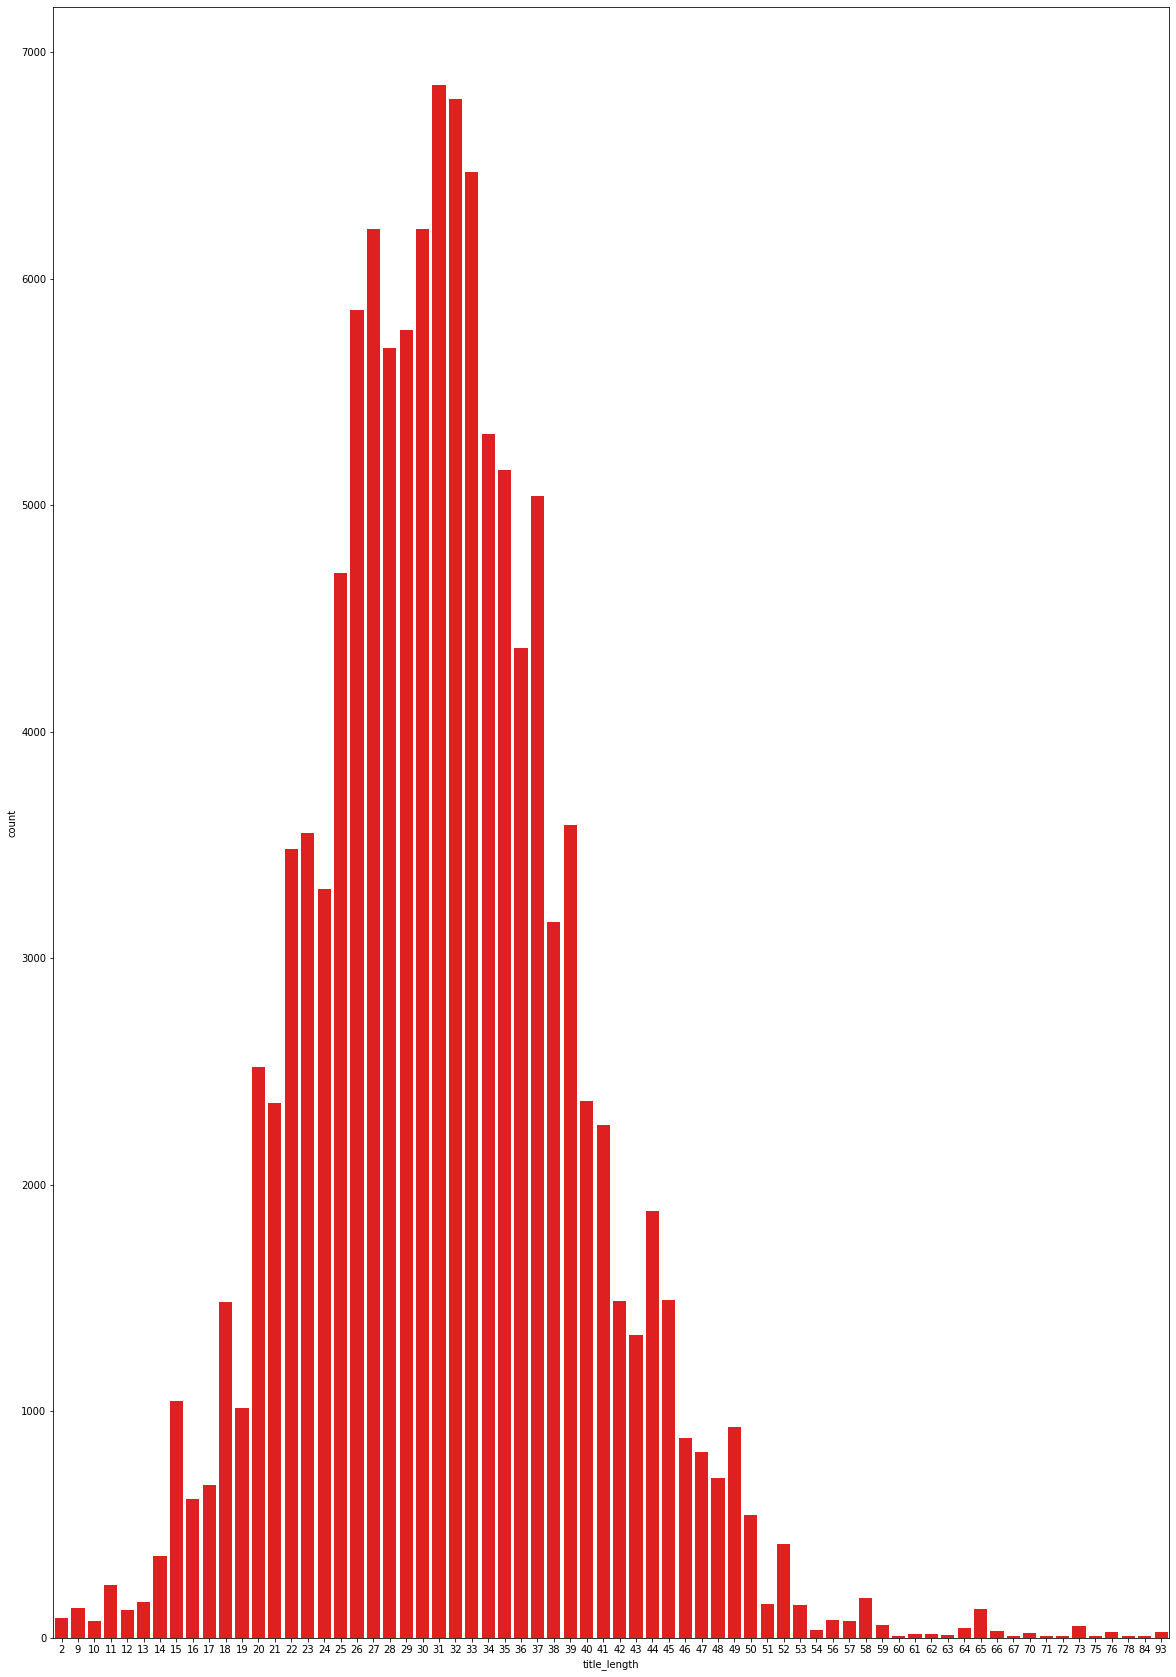

In [23]:
plt.figure(figsize = (20,30))
sns.countplot(train['title_length'], color = 'r') 

In [24]:
train['content_length'] = train['content'].apply(lambda x : len(x)) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='content_length', ylabel='count'>

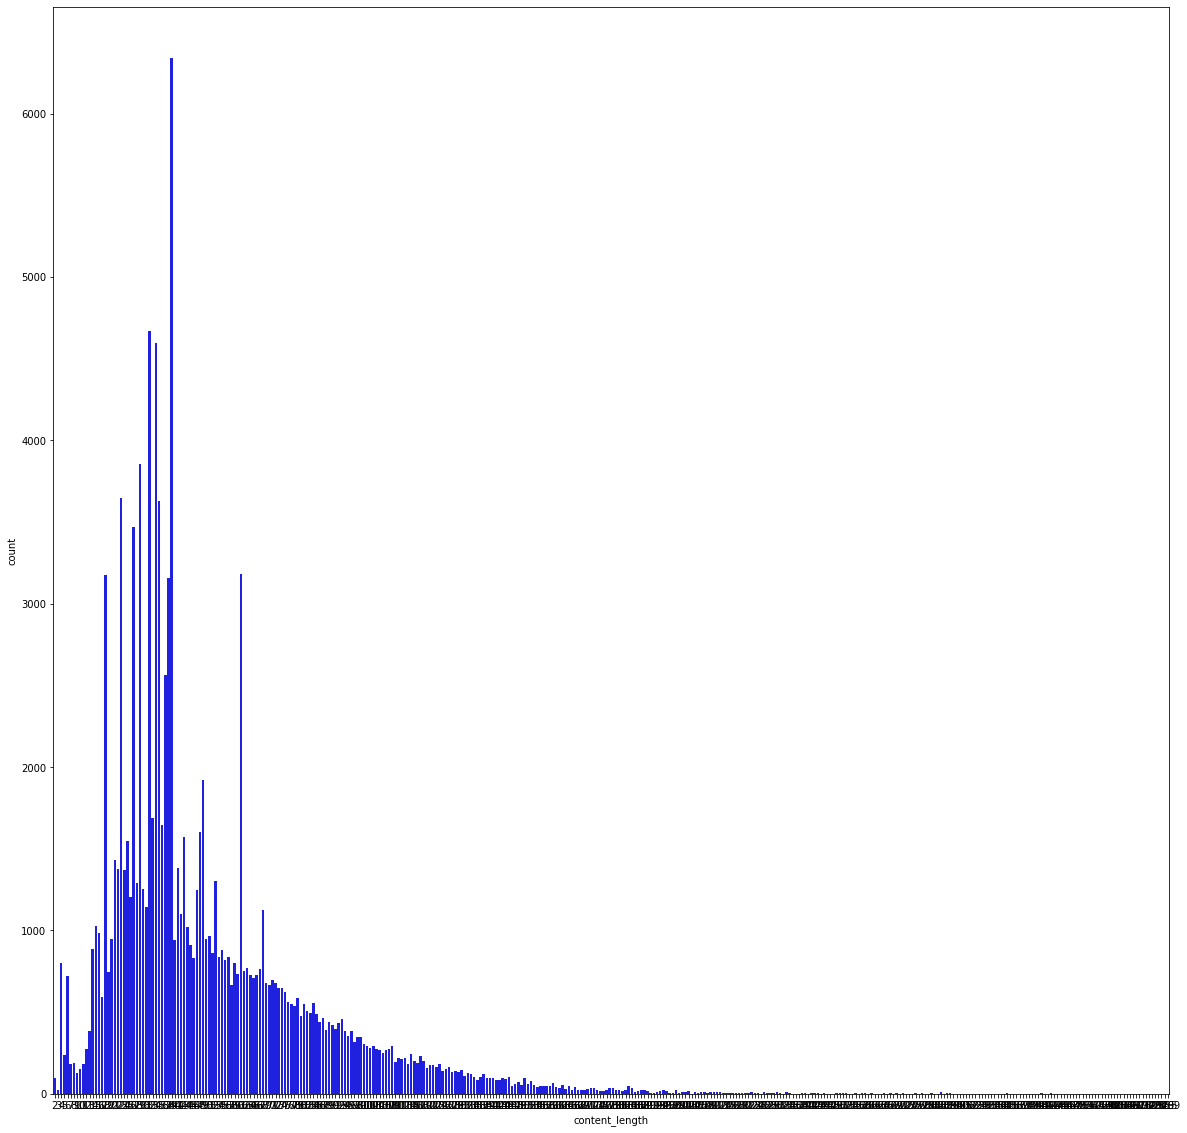

In [25]:
plt.figure(figsize = (20,20))
sns.countplot(train['content_length'], color = 'blue') 

In [26]:
embedding_vector_feature_title = 10
embedding_vector_feature_text = 100
vo_size = 20000 

input_title = Input(shape=(50,))
input_text = Input(shape=(1000,))

emb_title = Embedding(vo_size,embedding_vector_feature_title)(input_title)
lstm_title = Bidirectional(LSTM(128, return_sequences=False))(emb_title)

emb_text = Embedding(vo_size,embedding_vector_feature_text)(input_text)
lstm_text = Bidirectional(LSTM(128, return_sequences=True))(emb_text)
max_pool_text = GlobalMaxPool1D()(lstm_text)
dropout_1_text = Dropout(0.1)(max_pool_text)
dense_1_text = Dense(50, activation='relu')(dropout_1_text)
dropout_2_text = Dropout(0.1)(dense_1_text)

out = concatenate([lstm_title,dropout_2_text],axis=-1)
output=Dense(1, activation='sigmoid')(out)

model = Model(inputs=[input_title, input_text], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1000, 100)    2000000     input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 1000, 256)    234496      embedding_1[0][0]                
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 256)          0           bidirectional_1[0][0]            
_______________________________________________________________________________________

### Data Preprocessing 

using the practice code outlined above, I will preprocess texts using Mecab, then tokenize and pad. And then I will save them for training purposes

as an initial attempt, we will not clean the data and use the data in its raw form. 

In [27]:
x_title = train['title'] 
x_title = np.asarray(x_title)

In [28]:
x_content = train['content'] 
x_content = np.asarray(x_content)

In [29]:
x_title.shape, x_content.shape

((118745,), (118745,))

In [30]:
mecab_tokenizer = Mecab() 

In [31]:
x_title_morphed = [] 
for i in range(x_title.shape[0]):  
    x_title_morphed.append(mecab_tokenizer.morphs(x_title[i]))

In [32]:
x_title_morphed = np.asarray(x_title_morphed)
x_title_morphed.shape

(118745,)

In [33]:
# printing out to check 
x_title_morphed[10]

['롯데', '·', '공영', '등', '7', '개', 'TV', '홈', '쇼핑', '들', ',', '동행', '세일', '동참']

In [34]:
x_content_morphed = [] 
for i in range(x_content.shape[0]):  
    x_content_morphed.append(mecab_tokenizer.morphs(x_content[i]))

In [35]:
x_content_morphed = np.asarray(x_content_morphed)
x_content_morphed.shape

(118745,)

In [36]:
x_content_morphed[10]

['첫',
 '방송',
 '으로',
 '6',
 '월',
 '26',
 '일',
 '부터',
 '공영',
 '홈',
 '쇼핑',
 '은',
 '마스크',
 ',',
 '식기',
 '세트',
 '등',
 '생활',
 '용품',
 '과',
 '신선',
 '식품',
 '등',
 '의',
 '17',
 '개',
 '제품',
 '을',
 '최대',
 '50',
 '%',
 '할인',
 '된',
 '가격',
 '으로',
 '판매',
 '하',
 '고',
 '이어서',
 '6',
 '개',
 '민간',
 '홈',
 '쇼핑',
 '사',
 '들',
 '도',
 '동행',
 '세일',
 '판매',
 '방송',
 '에',
 '동참',
 '할',
 '계획',
 '이',
 '다']

we will now tokenize data and save them for training 

In [37]:
tokenizer_title = Tokenizer() 
tokenizer_title.fit_on_texts(x_title_morphed)

In [38]:
train_title_sequences = tokenizer_title.texts_to_sequences(x_title_morphed)

In [42]:
num_title_tokens = [len(tokens) for tokens in train_title_sequences] 
num_title_tokens = np.asarray(num_title_tokens) 
max_title_tokens = np.mean(num_title_tokens) + 2*np.std(num_title_tokens) 
max_title_tokens = int(max_title_tokens)
print(max_title_tokens)

23


In [54]:
train_title_padded = pad_sequences(train_title_sequences, padding = 'post', maxlen = max_title_tokens)

In [57]:
np.save('train_title_padded_x.npy',train_title_padded)

we do the same for the content

In [58]:
tokenizer_content = Tokenizer() 
tokenizer_content.fit_on_texts(x_content_morphed)

In [59]:
train_content_sequences = tokenizer_content.texts_to_sequences(x_content_morphed)

In [65]:
num_content_tokens = [len(tokens) for tokens in train_content_sequences]
num_content_tokens = np.asarray(num_content_tokens) 
max_content_tokens = np.mean(num_content_tokens) + 2*np.std(num_content_tokens) 
max_content_tokens = int(max_content_tokens) 
print(max_content_tokens)

61


In [66]:
train_content_padded = pad_sequences(train_content_sequences, padding = 'post', maxlen = max_content_tokens)

In [68]:
np.save('train_content_padded_x.npy',train_content_padded)

In [70]:
y_train = train['info']
y_train = np.asarray(y_train)
y_train.shape

(118745,)

In [71]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

In [72]:
np.save('y_train.npy',y_train)

We also process the test data 

In [73]:
x_title_test = test['title'] 
x_title_test = np.asarray(x_title_test)

In [74]:
x_content_test = test['content'] 
x_content_test = np.asarray(x_content_test) 

In [75]:
x_title_test.shape, x_content_test.shape

((142565,), (142565,))

In [76]:
x_title_test[0]

'[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대'

In [77]:
x_content_test[0]

"마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가'"

In [78]:
x_title_test_morphed = [] 
for i in range(x_title_test.shape[0]):  
    x_title_test_morphed.append(mecab_tokenizer.morphs(x_title_test[i]))

In [79]:
x_title_test_morphed = np.asarray(x_title_test_morphed) 
x_title_test_morphed.shape

(142565,)

In [91]:
test_title_sequences = tokenizer_title.texts_to_sequences(x_title_test_morphed)

In [92]:
test_title_padded = pad_sequences(test_title_sequences, padding = 'post', maxlen = max_title_tokens)   

In [93]:
np.save('test_title_padded.npy',test_title_padded) 

In [88]:
x_content_test_morphed = [] 
for i in range(x_content_test.shape[0]):  
    x_content_test_morphed.append(mecab_tokenizer.morphs(x_content_test[i]))

In [89]:
x_content_test_morphed = np.asarray(x_content_test_morphed)
x_content_test_morphed.shape

(142565,)

In [95]:
test_content_sequences = tokenizer_content.texts_to_sequences(x_content_test_morphed)

In [96]:
test_content_padded = pad_sequences(test_content_sequences, padding = 'post', maxlen = max_content_tokens)

In [102]:
np.save('test_content_padded.npy',test_content_padded) 

To find the vocab size we are using, we can use the code below

In [84]:
num_title = len(tokenizer_title.word_index)+1 
num_title

9197

In [85]:
num_content = len(tokenizer_content.word_index)+1 
num_content

41573